# TP2 - AI : Heuristic Research and Constraint Satisfaction Problems
---
_Author: CHRISTOFOROU Anthony_\
_Due Date: 25-10-2023_\
_Updated: 18-10-2023_\
_Description: TP2 - AI_

---

In [61]:
# Libraries
import matplotlib
from IPython.display import HTML

# Modules
from assignment2.datastructures.node import Node
from assignment2.algorithms.greedy_search import GreedyBestFirstSearch
from assignment2.visualisations.visualise import GraphVisualizer, SearchPathVisualizer, SearchAnimationVisualizer

# make figures appear inline
matplotlib.rcParams['figure.figsize'] = (15, 8)
%matplotlib inline

# notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. A* Algorithm

![graph](./img/graph.png)

### 1.1. Blind Search

The directed graph shown in *Figure 1* represents the state space of a certain problem, with the transition costs denoted by the numbers on the edges. The initial state, $S_I$​, is denoted by "S" and the goal state, $S_G$, is denoted by "G". We aim to traverse this graph to reach the goal state from the initial state using a blind search algorithm. Specifically, we will employ the Breadth-First Search (BFS) algorithm.

**Breadth-First Search (BFS) Development:**

Given the provided directed graph, we can use BFS starting from node **S** to reach node **G**.

<div class="alert alert-info">
We are going to search by alphabetical order, so <b>A</b> is visited before <b>F</b>.
</div>

**Development Table:**

| Node | Parent | Cost |
|------|--------|------|
| S    | -      | -    |
| A    | S      | 2    |
| F    | S      | 7    |
| C    | A      | 6    |
| H    | F      | 9    |
| G    | F      | 12   |
| D    | C      | 9    |

**Search Tree:**

```
      S
     / \
    A   F
   /   / \
  C   G   H
 /       
D 
```


### 1.2 Heuristic Search

The following table shows the heuristic $h(n)$ estimating the cost of the path until the goal state for each node $n$ in the graph.

| **State** | **S** | **A** | **C** | **D** | **F** | **G** | **H** |
|-----------|-------|-------|-------|-------|-------|-------|-------|
| **h(n)**  | 10    | 5     | 4     | 3     | 4     | 0     | 2     |

1. Let's show that this heuristic function is admissible and why:

**Definition**: A heuristic function $h(n)$ is said to be admissible if, for every node $n$ of the graph, $h(n)$ never overestimates the true cost to reach the goal node from $n$.

Given the heuristic values in the table above, to determine if $h$ is admissible, we would have to ensure that for each state, the heuristic value is less than or equal to the actual cost from that state to the goal state G.

This means that formally if we define the actual cost from state $n$ to the goal state $G$ as $c(n, G)$, then we would have to ensure that for each state $n$:

$$h(n) \leq c(n, G)$$

let's check this for each state using the cheapest path from each state to the goal state:

- $h(S) = 10 \leq c(S, G) = 11$ : **True**
- $h(A) = 5 \leq c(A, G) = 9$ : **True**
- $h(C) = 4 \leq c(C, G) = 5$ : **True**
- $h(D) = 3 \leq c(D, G) = 3$ : **True**
- $h(F) = 4 \leq c(F, G) = 5$ : **True**
- $h(G) = 0 \leq c(G, G) = 0$ : **True**
- $h(H) = 2 \leq c(H, G) = \varnothing$ : **True** (A cost of 2 is better than an impossible cost)

2. Now, let's show that this heuristic function is consistent and why:

**Definition**: A heuristic function $h(n)$ is said to be consistent (or monotone) if, for every node $n$ of the graph and for every successor $n'$ of $n$ with step cost $c(n, n')$, we have that:

$$h(n) \leq c(n, n') + h(n')$$

Given the heuristic values in the table above, to determine if $h$ is consistent, we would have to ensure that for each state, the heuristic value is less than or equal to the actual cost from that state to the goal state G.

To prove that $h$ is not consistent, we need to find a state $n$ and one of its successors $n'$ such that $h(n) > c(n, n') + h(n')$. In our case we can take $n = S$ and $n' = A$:

$$h(S) = 10 > c(S, A) + h(A) = 2 + 5 = 7$$ 

This does not satisfy the consistency condition, **so $h$ is not consistent**.

3. What are the evaluation functions used by the greedy best first search and the A* algorithm?

- **Greedy Best First Search**: $f(n) = h(n)$

> This method selects the node based on the heuristic value alone. It aims to expand the node that is closest to the goal, as estimated by the heuristic function.

- **A\* Algorithm**: $f(n) = g(n) + h(n)$

> Where:
> 
> - $g(n)$ is the cost of the path from the start node to $n$
> - $h(n)$ is the estimated cost from $n$ to the goal node (heuristic function)
> 
> The A* algorithm considers both the cost to reach the current node and the estimated cost from the current node to the goal.

4. Let's implement the **Greedy Best First Search**

In [62]:
# defining the graph and the functions
from typing import List, Tuple

GRAPH = {
    'S': [('F'), ('A')],
    'F': [('H'), ('G'), ('A')],
    'A': [('C'), ('F')],
    'C': [('D'), ('G')],
    'D': [('G')],
    'G': [],
    'H': []
}
HEURISTIC = {
    'S': 10,
    'A': 5,
    'C': 4,
    'D': 3,
    'F': 4,
    'G': 0,
    'H': 2
}
ALL_EDGES = [
    ('S', 'F'), 
    ('S', 'A'), 
    ('F', 'H'), 
    ('F', 'G'), 
    ('F', 'A'), 
    ('A', 'C'), 
    ('A', 'F'), 
    ('C', 'D'), 
    ('C', 'G'), 
    ('D', 'G')
]

def successors(state: str) -> List[Tuple[str, float]]:
    return GRAPH.get(state, [])

def heuristic(state: str) -> float:
    return HEURISTIC.get(state, float('inf'))  # Return a large value for states not in the heuristic


In [63]:
# Define start node and goal state
start_node = Node("S")
goal_state = "G"

# search algorithm
gbfs = GreedyBestFirstSearch(goal_test=lambda s: s == goal_state, successors=successors, heuristic=heuristic) # Initialise the search algorithm
path = gbfs.execute(start_node, goal_state) # Execute the search

if path is None:
    print("No path found")
else:
    print("Path found:", path)

Path found: [S, F, G]


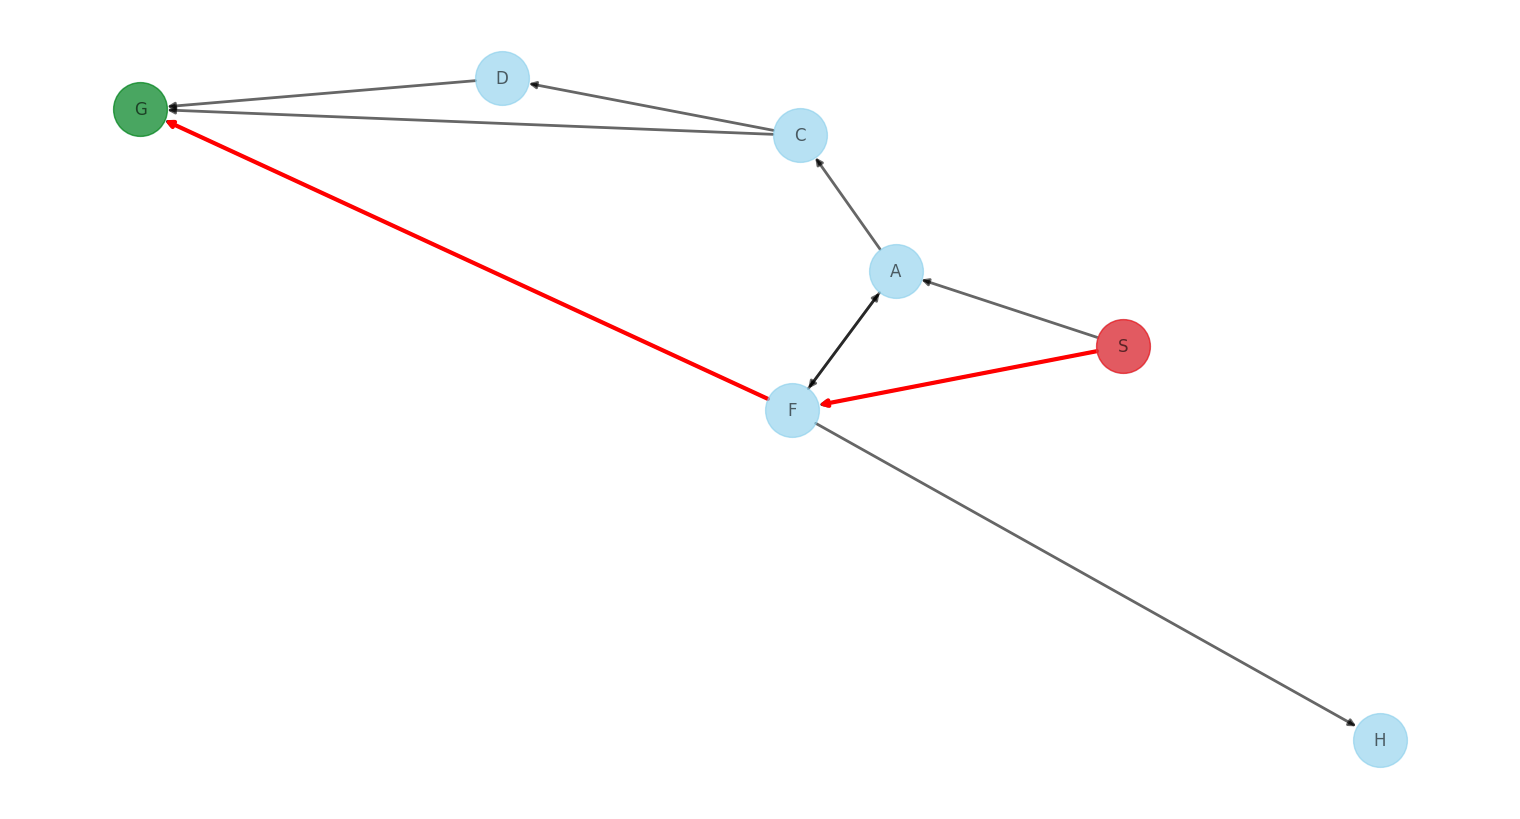

In [67]:
spv = SearchPathVisualizer(ALL_EDGES) # Initialise the search path visualiser
spv.plot_search_path(path) # Visualise the search path


5. How could we modify this algorithm to make it into the A* algorithm?

- Instead of using the heuristic function $h(n)$, we use the evaluation function $f(n) = g(n) + h(n)$
- When exploring a node, we add the cost of the path from the start node to the current node as $g(n)$